# Named Entity Recognition (NER) with Fake News

### Autor: Roberto Maeso Benito
Junio 2021

**Breve resumen del notebook**

Se ha escogido el dataset de Fake News para desarrollar el Named Entity Recognition (NER). Disponeble en https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset#True.csv

El objetivo del notebook es clasificar cada una de las noticias del dataframe en diferentes entidades (personas, ubicaciones, organizaciones, etc.). Para ello se ha utilizado la liberia spacy, que permite clasificar texto y diferentes entidades. En concreto, se ha utilizado la propio documentación de la libreria (https://spacy.io/api) y el breve resumen introducctorio de Dataquest (https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/). 

Dado que existen datos de noticias falsas y verdaderas, se han cogido las primeras para realizar los análisis.

### Tabla de contenidos  <a name="indice"></a>

- [Importing libraries and loading dataset](#data)
- [Exploratory data analysis](#eda)
- [Named Entity Recognition with Spacy](#m)
- [Results & Output](#output)

### Importing libraries and loading dataset<a name="data"></a> 
[Volver al índice](#indice)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
stop_words = set(stopwords.words('english'))

In [2]:
filename = "Fake.csv"
#filename = "training_data\\hate_related.csv"
df = pd.read_csv(filename
                 , encoding = 'latin'
                 , index_col = False
                 , usecols = [1] # solo utilizamos la columna de texto (se descarta el resto de información)
)
print(df.shape)
df.head()

(23481, 1)


,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


### Named Entity Recognition with Spacy<a name="ner"></a> 
[Volver al índice](#indice)

En primer lugar, utilizamos spacy para entender cuales son las principales tareas que vamos a realizar con cada una de las noticias. Así, y de forma ilustrativa, se utiliza el método display de spacy para visualizar las distintas clasificaciones que realiza spacy sobre el texto.

Posteriormente, se generaliza esta clasificación sobre el conjunto del dataframe. Todo ello, con el obetivo de obtener un df final donde para cada noticia obtenmos una columna con la entidad correspondiente. En concreto, se han seleccionado 4 entidades (persona, organización, fecha y lozalización), aunque esto puede generalizarse facilmente para incluir aquellas identidades de interés.

In [3]:
# for natural language processing: named entity recognition
import spacy
import en_core_web_sm

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'textcat','lemmatizer'])

In [5]:
from spacy.symbols import nsubj, VERB

first_text = df['text'][0]
doc = nlp(first_text)
spacy.displacy.render(doc, style='ent',jupyter=True)

De forma similar, a continuación se crea una función que imprime todas las entities encontradas en el texto, con su correspondiente label e información adicional

In [6]:
def text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [7]:
text_entities(df['text'][0])

Entity: Donald Trump, Label: PERSON, People, including fictional
Entity: Americans, Label: NORP, Nationalities or religious or political groups
Entity: New Year, Label: EVENT, Named hurricanes, battles, wars, sports events, etc.
Entity: one, Label: CARDINAL, Numerals that do not fall under another type
Entity: Country, Label: ORG, Companies, agencies, institutions, etc.
Entity: Fake News Media, Label: ORG, Companies, agencies, institutions, etc.
Entity: Angry Pants, Label: PERSON, People, including fictional
Entity: 2018, Label: DATE, Absolute or relative dates or periods
Entity: America, Label: GPE, Countries, cities, states
Entity: Country, Label: ORG, Companies, agencies, institutions, etc.
Entity: Fake News Media, Label: ORG, Companies, agencies, institutions, etc.
Entity: America, Label: GPE, Countries, cities, states
Entity: Donald J. Trump, Label: PERSON, People, including fictional
Entity: December 31, Label: DATE, Absolute or relative dates or periods
Entity: 2017Trump, Label:

Una vez visualizado la información que queremos recoger para cada texto, a continuación realizamos una función para poder recoger para cada texto las diferentes entidades. Dado que el dataset contiene mucha información de texto, y para agilizar el código, se ha cogido una muestra de la base de datos.

In [8]:
df=df.sample(frac=0.1, replace=True, random_state=1)

Para separar bien las entidades que queremos coger, se realiza una función específica para cada una. Cada función recibe como input la columna de texto que nos interesa y saca como ouput una columna de listas con esas entidades.

In [9]:
# función para sacar el nombre de la persona
def get_person(df):    
    data = nlp(df)
    output = [text.text for text in data.ents if text.label_ == "PERSON"]
    return output

# función para sacar la organización
def get_org(df):    
    data = nlp(df)
    output = [text.text for text in data.ents if text.label_ == "ORG"]
    return output

# función para sacar la fecha
def get_date(df):    
    data = nlp(df)
    output = [text.text for text in data.ents if text.label_ == "DATE"]
    return output

# función para sacar un país, ciudad o estado
def get_GPE(df):    
    data = nlp(df)
    output = [text.text for text in data.ents if text.label_ == "GPE"]
    return output

Aplicamos cada una de las funciones para crear las variables con las identidades de interés

In [10]:
df['persona'] = df['text'].apply(get_person).str.join(',')
df['org'] = df['text'].apply(get_org).str.join(',')
df['date'] = df['text'].apply(get_date).str.join(',')
df['GPE'] = df['text'].apply(get_GPE).str.join(',')
df.head(30)

,text,persona,org,date,GPE
235,Sen. Bob Corker (R-TN) is being defended by on...,"Bob Corker,Donald Trump,Charlie Dent,Corker,De...","Senate,House,Trump,MSNBC,House,Senate,Congress...","Monday,2017","Tennessee,U.S.,the United States,Tennessee"
12172,Judge Jeanine Pirro has had it with the left a...,"Jeanine Pirro,Trump",,,America
5192,"While in Virginia, GOP presidential nominee Do...","Donald Trump,Donald,Donald,Obama,Katrina Piers...","GOP,The Daily Beast,Ball Corp.,Smithfield Food...","eight years ago,8 years ago,a decade,2014,March","Virginia,Loudoun County,Loudoun County,Loudoun..."
17289,So much for the promise of transparency from O...,"Mary Howard,Obama s,Lois Lerner,Howard,Lois Le...","Congress,IRS,IRS,IRS,Congress,Congress,Congres...","later this month,well over five years,May 19, ...",Washington
10955,This is so disturbing but such a wake up call ...,,"Nicola Porro,the Station Terminal of Rome,Fran...",yesterday,"America,America,Italy"
7813,"Once again, Bette Midler has outdone herself i...","Bette Midler,Donald Trump,Mitch McConnell,Ted ...","Fox News,ACTUAL,Adolf Hitler","2016,Saturday","Benghazi,Oklahoma,Oklahoma City,America"
19279,"#disruptj20 protesters on the move, many leavi...",Ryan Lovelace,@LovelaceRyanD,"January 20, 2017",
21440,He did the same thing at Obama s inauguration ...,"Bob Brady,Brady,Obama s,Brady,Pope Francis,Oba...","Gateway PunditBut,the Philadelphia Daily News",,
144,"When we talk about getting rid of Trump, we al...","Mike Pence,Mila Kunis,Kunis","LGBT,Planned Parenthood,Planned Parenthood,Con...",,Indiana
20609,A MUST watch video!https://youtu.be/-5Z-jJ2Z4bU,,,,


Tal y como podemos observar, gracias a spacy, obtenemos para cada una de las noticias columnas específicas con las entidades que nos han resultado de interés: persona, organización, fecha y localización. A continuación realizamos un análisis con algunos resultados interesantes.

### Exploratory Data Analysis<a name="eda"></a> 
[Volver al índice](#indice)

En esta sección realizamos un breve análisis del texto con el objetivo de identificar las principales identidades. Posteriormente, se realiza un anális concreto para algunas identidades que aparecen de forma muy frecuente.

A traves de Wordcloud se representan las personas, organizaciones y localizaciones que más aparecen en nuestro NER:

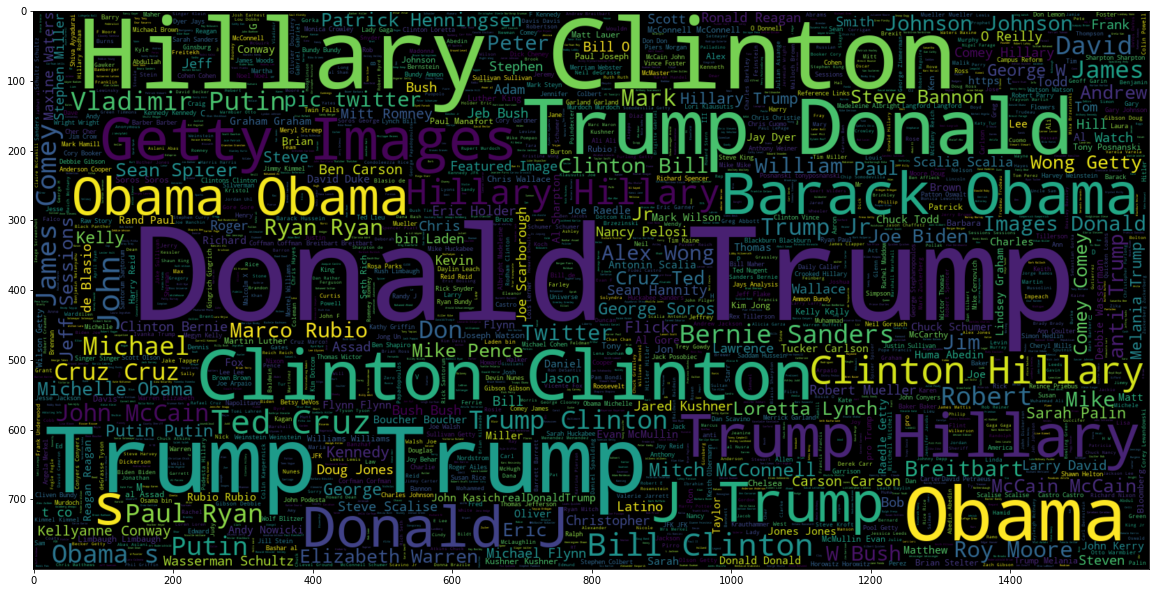

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
plt.figure(figsize = (20,20)) 
w = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['persona']))
plt.imshow(w , interpolation = 'bilinear')

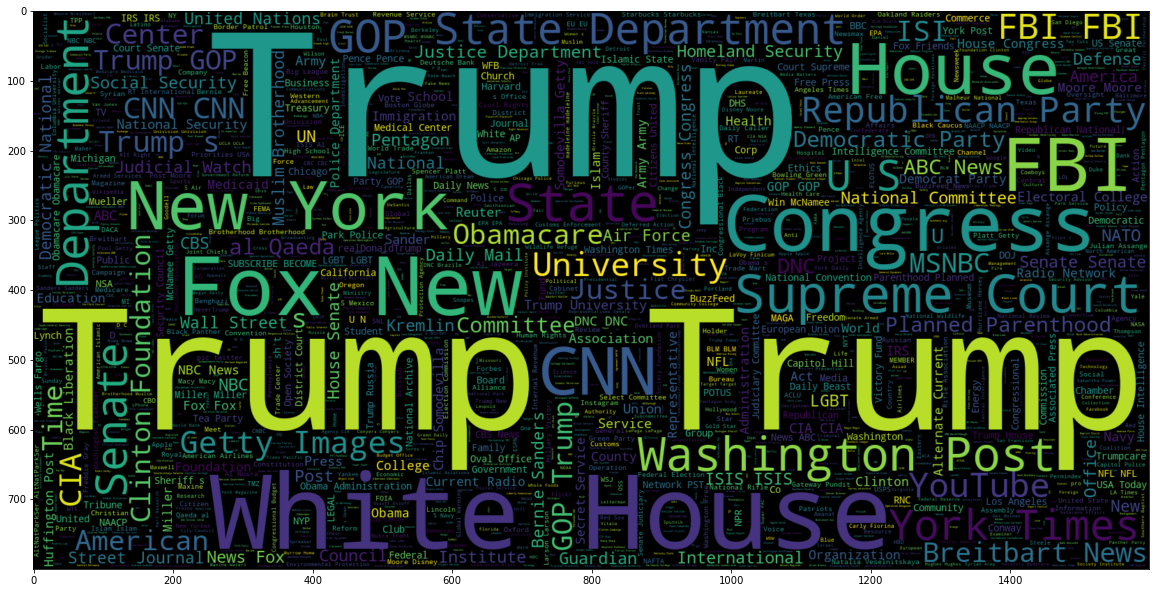

In [14]:
plt.figure(figsize = (20,20)) 
w = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['org']))
plt.imshow(w , interpolation = 'bilinear')

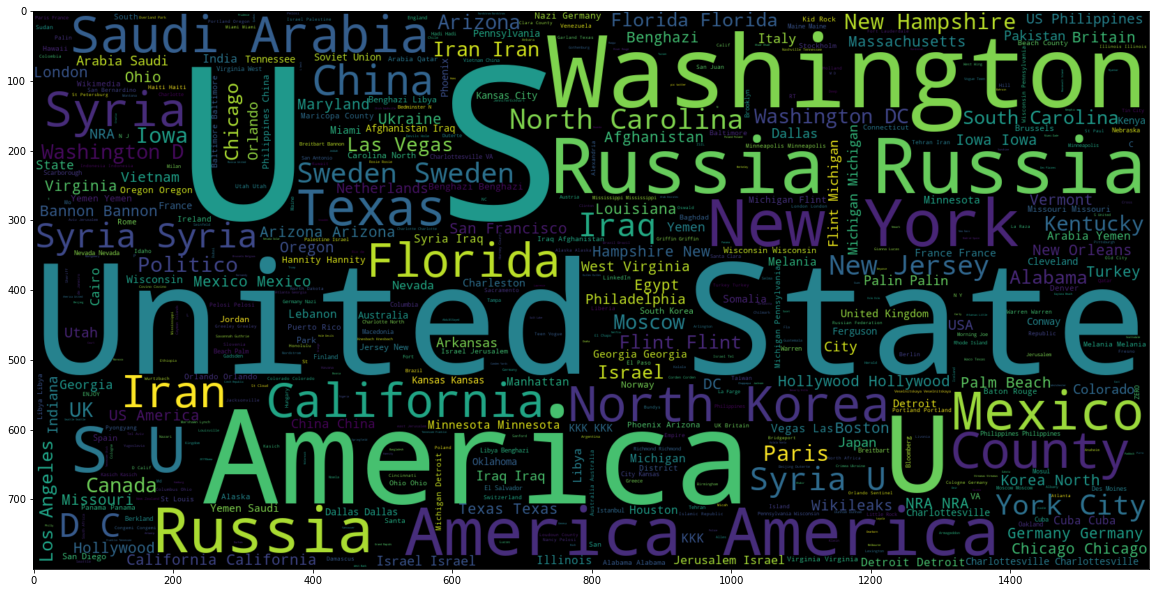

In [15]:
plt.figure(figsize = (20,20)) 
w = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['GPE']))
plt.imshow(w , interpolation = 'bilinear')

Como podemos observar Donald Trump es uno de los personajes que más aparece. Por este motivo, vamos a realizar un analisis para ver las palabras asociadas a Trump que más se repiten en las noticias. 

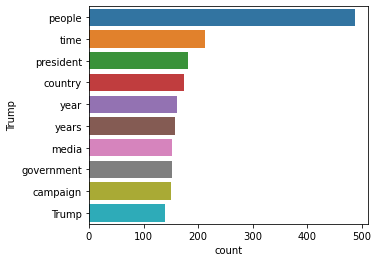

In [22]:
from spacy.symbols import nsubj, VERB
nlp = spacy.load('en_core_web_sm')

text = df['text'].str.cat(sep=' ')

# maximum length allowed is 1000000
max_length = 1000000-1
text = text[:max_length]

# remove URLs substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

doc = nlp(text)

# generate a list with all words greater than two letters and nouns 
Trump= []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        Trump.append(token)
        
Trump = [str(x) for x in Trump]

# plot a graph with nouns associated with Trump
df_trump = pd.DataFrame(Trump, columns=["Trump"])
df_trump
plt.figure(figsize=(5,4))
sns.countplot(y="Trump",
             data=df_trump,
             order=df_trump["Trump"].value_counts().iloc[:10].index)
plt.show()

A continuación realizamos un análisis similar pero con la identidad de organización. En concreto, analizamos la palabra Congress que también es una de las más frecuentes

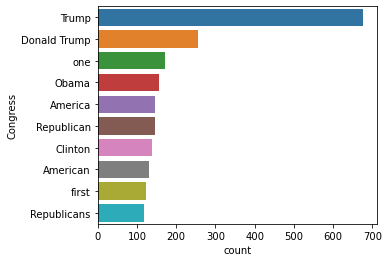

In [24]:
items = list(doc.ents)
items = [str(item) for item in items_of_interest]

df_congress = pd.DataFrame(items, columns=["Congress"])
plt.figure(figsize=(5,4))
sns.countplot(y="Congress",
             data=df_congress,
             order=df_congress["Congress"].value_counts().iloc[:10].index)
plt.show()

### Results & Output <a name="results"></a> 
[Volver al índice](#indice)

In [25]:
df.head()

,text,persona,org,date,GPE
235,Sen. Bob Corker (R-TN) is being defended by on...,"Bob Corker,Donald Trump,Charlie Dent,Corker,De...","Senate,House,Trump,MSNBC,House,Senate,Congress...","Monday,2017","Tennessee,U.S.,the United States,Tennessee"
12172,Judge Jeanine Pirro has had it with the left a...,"Jeanine Pirro,Trump",,,America
5192,"While in Virginia, GOP presidential nominee Do...","Donald Trump,Donald,Donald,Obama,Katrina Piers...","GOP,The Daily Beast,Ball Corp.,Smithfield Food...","eight years ago,8 years ago,a decade,2014,March","Virginia,Loudoun County,Loudoun County,Loudoun..."
17289,So much for the promise of transparency from O...,"Mary Howard,Obama s,Lois Lerner,Howard,Lois Le...","Congress,IRS,IRS,IRS,Congress,Congress,Congres...","later this month,well over five years,May 19, ...",Washington
10955,This is so disturbing but such a wake up call ...,,"Nicola Porro,the Station Terminal of Rome,Fran...",yesterday,"America,America,Italy"


El análisis realizado para identificar diferentes entidades de un texto puede servir para realizar un modelo de clasificación de texto en el que en lugar de introducir todo el texto al modelo se introducen las entidades seleccionadas. Por ejemplo, Donal Trump aparece de forma muy frecuente en estas noticias falsas analizadas. Si sabemos de antemano que su nombre tiende a aparecer mucho más en las noticias falsas que en las verdederas, entonces puede ser un buen predictor para clasificar de forma correcta las noticias (falsas/verderas). 

De esta forma, y aunque no era el objetivo de este notebook, este análisis realizado puede ser utilizado para mejorar nuestros modelos de clasificación de texto.